In [2]:
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
import numpy as np

train_dir = "D:/AI/ASL/Dataset/asl_alphabet_train/asl_alphabet_train/"
test_dir =  "D:/AI/ASL/Dataset/asl_alphabet_test/asl_alphabet_test/"
IMG_SIZE = 50
labels_map = {'A':0,'B':1,'C': 2, 'D': 3, 'E':4,'F':5,'G':6, 'H': 7, 'I':8, 'J':9,'K':10,'L':11, 'M': 12, 'N': 13, 'O':14, 
                'P':15,'Q':16, 'R': 17, 'S': 18, 'T':19, 'U':20,'V':21, 'W': 22, 'X': 23, 'Y':24, 'Z':25, 
                'del': 26, 'nothing': 27,'space':28}

In [15]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [3]:
def create_train_data():
    x_train = []
    y_train = []
    for folder_name in os.listdir(train_dir):
        label = labels_map[folder_name]
        for image_filename in tqdm(os.listdir(train_dir + folder_name)):
            path = os.path.join(train_dir,folder_name,image_filename)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE ))
            x_train.append(np.array(img))
            y_train.append(np.array(label))
    print("Done creating train data")
    return x_train, y_train




In [4]:
def create_test_data():
    x_test = []
    y_test = []
    for folder_name in os.listdir(test_dir):
        label = folder_name.replace("_test.jpg","")
        label = labels_map[label]
        path = os.path.join(test_dir,folder_name)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE ))
        x_test.append(np.array(img))
        y_test.append(np.array(label))
    print("Done creating test data")
    return x_test,y_test

In [5]:
x_train, y_train= create_train_data()  


100%|██████████| 3000/3000 [00:15<00:00, 191.75it/s]

Done creating train data


In [6]:
x_test,y_test = create_test_data()

Done creating test data


In [7]:
X = [x_train, x_test]
y = [y_train, y_test]

In [16]:
from sklearn.model_selection import train_test_split



def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

C:\Users\sudha\AppData\Local\Temp\ipykernel_13572\1755319501.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_X = np.array(X)


ValueError: setting an array element with a sequence.

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [17]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18209476940301103117
xla_global_id: -1
]


In [ ]:
num_features = 2500
num_classes = 29

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

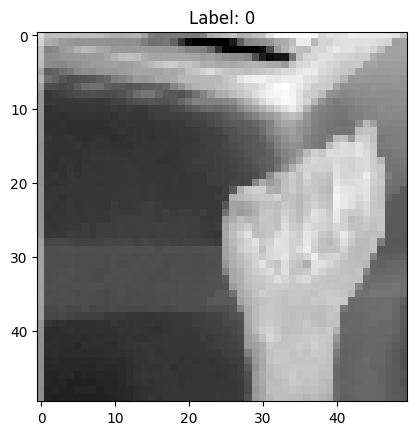

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_image(num):
    label = y_train[num]
    plt.title('Label: %d' % (label))
    image = x_train[num].reshape([IMG_SIZE,IMG_SIZE])
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_image(5)

In [22]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

In [20]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(87000).batch(batch_size).prefetch(1)



In [23]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [24]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

d:\Python\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                      